## Having a porch increases home sale price
Null hypothesis H_0: Having a porch does not increase home sale price.

Alternative hypothesis H_a: Having a porch does increase home sale price.

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns

In [2]:
engine = create_engine("postgresql:///housing_prices")

df = pd.read_sql("""
    SELECT * 
    FROM housing_data;
    """, con = engine)

In [3]:
df.sample(5)

,doc_date,major,minor,saleprice,sqftopenporch,sqftenclosedporch,sqfttotliving,yrbuilt,years_ren_ago,bedrooms,...,directionprefix,sqftgarageattached,brickstone,bathfullcount,wfntlocation,trafficnoise,airportnoise,powerlines,porch,contamination
11192,07/13/2018,032305,9300,575000,0,0,2210,2000,0,4,...,NE,400,0,2,0,0,0,0,0,0
8111,06/14/2018,982870,0945,915000,0,0,3380,1916,19,4,...,E,0,0,1,0,0,0,0,0,0
14189,06/01/2018,092305,9258,589000,150,0,2040,2014,0,4,...,NE,420,0,2,0,0,0,0,1,0
1452,06/18/2018,322405,9079,720000,0,0,1760,1990,0,3,...,SE,520,0,1,0,0,0,0,0,0
8965,09/24/2018,330670,0130,410000,30,0,1860,2012,0,3,...,S,440,0,2,0,0,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14411 entries, 0 to 14410
Data columns (total 21 columns):
doc_date              14411 non-null object
major                 14411 non-null object
minor                 14411 non-null object
saleprice             14411 non-null int64
sqftopenporch         14411 non-null int64
sqftenclosedporch     14411 non-null int64
sqfttotliving         14411 non-null int64
yrbuilt               14411 non-null int64
years_ren_ago         14411 non-null int64
bedrooms              14411 non-null int64
nbrlivingunits        14411 non-null int64
directionprefix       14411 non-null object
sqftgarageattached    14411 non-null int64
brickstone            14411 non-null int64
bathfullcount         14411 non-null int64
wfntlocation          14411 non-null int64
trafficnoise          14411 non-null int64
airportnoise          14411 non-null int64
powerlines            14411 non-null object
porch                 14411 non-null object
contamination         144

In [5]:
df['porch'] = df['porch'].astype(int)
df['powerlines'] = df['powerlines'].astype(int)
df.head()

,doc_date,major,minor,saleprice,sqftopenporch,sqftenclosedporch,sqfttotliving,yrbuilt,years_ren_ago,bedrooms,...,directionprefix,sqftgarageattached,brickstone,bathfullcount,wfntlocation,trafficnoise,airportnoise,powerlines,porch,contamination
0,05/10/2018,276760,1822,895000,0,0,1450,2017,0,2,...,,0,0,2,0,2,0,0,0,0
1,03/01/2018,425000,0030,505000,0,0,1380,1962,0,3,...,,620,0,1,0,0,0,0,0,0
2,10/23/2018,781280,1420,439950,0,0,1580,1945,0,4,...,S,0,0,1,0,0,0,1,0,0
3,03/29/2018,781280,1420,215000,0,0,1580,1945,0,4,...,S,0,0,1,0,0,0,1,0,0
4,10/17/2018,882490,0210,875000,190,0,1890,1919,0,4,...,NE,0,0,1,0,0,0,0,1,0


In [6]:
df['airportnoise'].value_counts()
df['contamination'].value_counts()
df['age'] = 2019 - df['yrbuilt']
df

,doc_date,major,minor,saleprice,sqftopenporch,sqftenclosedporch,sqfttotliving,yrbuilt,years_ren_ago,bedrooms,...,sqftgarageattached,brickstone,bathfullcount,wfntlocation,trafficnoise,airportnoise,powerlines,porch,contamination,age
0,05/10/2018,276760,1822,895000,0,0,1450,2017,0,2,...,0,0,2,0,2,0,0,0,0,2
1,03/01/2018,425000,0030,505000,0,0,1380,1962,0,3,...,620,0,1,0,0,0,0,0,0,57
2,10/23/2018,781280,1420,439950,0,0,1580,1945,0,4,...,0,0,1,0,0,0,1,0,0,74
3,03/29/2018,781280,1420,215000,0,0,1580,1945,0,4,...,0,0,1,0,0,0,1,0,0,74
4,10/17/2018,882490,0210,875000,190,0,1890,1919,0,4,...,0,0,1,0,0,0,0,1,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14406,01/24/2018,669900,1110,430000,200,0,3560,2002,0,4,...,440,0,2,0,0,0,0,1,0,17
14407,08/28/2018,542304,0190,877500,90,0,2250,1980,0,4,...,500,0,1,0,0,0,0,1,0,39
14408,12/27/2018,881840,0680,1470000,170,0,2120,1911,0,4,...,0,0,1,0,0,0,0,1,0,108
14409,04/20/2018,124550,0545,1200000,290,0,3560,2019,0,5,...,630,0,2,0,0,0,0,1,0,0


In [111]:
print(df['directionprefix'].value_counts())
df_direction = pd.get_dummies(df['directionprefix'], drop_first=True)
# df.drop(['  ', 'E ', 'N ', 'NE', 'NW', 'S ', 'SE', 'SW', 'W '], axis=1, inplace=True)
df = pd.concat([df, df_direction], axis=1)
df.columns


      8723
SE    1637
NE    1590
S      917
SW     540
NW     352
N      337
E      170
W      118
        27
Name: directionprefix, dtype: int64


Index(['doc_date', 'major', 'minor', 'saleprice', 'sqftopenporch',
       'sqftenclosedporch', 'sqfttotliving', 'yrbuilt', 'years_ren_ago',
       'bedrooms', 'nbrlivingunits', 'directionprefix', 'wfntlocation',
       'trafficnoise', 'airportnoise', 'powerlines', 'porch', 'contamination',
       'age', '  ', 'E ', 'N ', 'NE', 'NW', 'S ', 'SE', 'SW', 'W '],
      dtype='object')

In [113]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

X = df[['sqfttotliving','sqftopenporch', 'trafficnoise', 'powerlines', 'age', 'E ', 'N ', 'NE', 'NW', 'S ', 'SE', 'SW', 'W ']]
Y = df['saleprice']
X_scaled = (X - np.mean(X)) / np.std(X)
predictors = sm.add_constant(X_scaled)
model = sm.OLS(np.asarray(Y), predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     666.9
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:32:35   Log-Likelihood:            -2.0928e+05
No. Observations:               14411   AIC:                         4.186e+05
Df Residuals:                   14397   BIC:                         4.187e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.694e+05   4088.998    188.152      0.000    7.61e+05    7.77e+05
sqfttotliving  3.609e+05   4770.641     75.640      0.000    3.52e+05     3.7e+05
sqftopenporch  4.217e+04   4533.820      9.301      0.000    3.33e+04    5.11e+04
trafficnoise   1.889e+04   4112.218      4.592      0.000    1.08e+04    2.69e+04
powerlines    -7696.3363   4093.992     -1.880      0.060   -1.57e+04     328.416
age            7.427e+04   4419.667     16.804      0.000    6.56e+04    8.29e+04
E              4.412e+04   4115.616     10.721      0.000    3.61e+04    5.22e+04
N              2.183e+04   4131.740      5.283      0.000    1.37e+04    2.99e+04
NE             3.094e+04   4207.618      7.354      0.000    2.27e+04    3.92e+04
NW             3.637e+04   4123.863      8.819      0.000    2.83e+04    4.45e+04
S             -4.185e+04   4172.251    -10.031      0.000      -5e+04   -3.37e+04
SE            -3.303e+04   4238.475     -7.793      0.000   -4.13e+04   -2.47e+04
SW            -2.595e+04   4137.704     -6.272      0.000   -3.41e+04   -1.78e+04
W              3.359e+04   4109.596      8.174      0.000    2.55e+04    4.16e+04
==============================================================================
Omnibus:                    26427.772   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        151793855.630
Skew:                          13.030   Prob(JB):                         0.00
Kurtosis:                     505.113   Cond. No.                         1.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

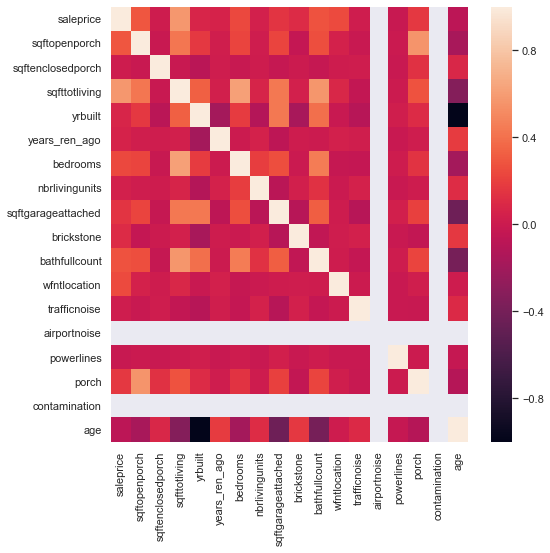

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8, 8)})
# Use the .heatmap method to depict the relationships visually!
sns.heatmap(df.corr());